In [24]:
from langchain_huggingface import ChatHuggingFace , HuggingFaceEndpoint
from dotenv import load_dotenv

In [25]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain.prompts import PromptTemplate

In [26]:
llm= HuggingFaceEndpoint(
    repo_id="google/gemma-2-2b-it",
    task="text-generation"
)
model = ChatHuggingFace(llm=llm)

In [27]:
#create state

class promptllm(TypedDict):
    topic:str
    outline:str
    blog:str

In [28]:
def blog_LLM(state:promptllm)->promptllm:
    outline = state['outline']

    prompt = PromptTemplate(
        template='crete a blog  for the {outline} given also make sure to have a examples in this blog ',
        input_variables=['outline']
    )
    final_prompt = prompt.format(outline=outline)
    blog = model.invoke(final_prompt).content

    state['blog'] = blog
    return state

In [29]:
def outline_LLM(state:promptllm)->promptllm:
    topic = state['topic']

    prompt = PromptTemplate(
        template='crete a outline for the {topic} given also list hte points to write a blog on this topic',
        input_variables=['topic']
    )
    final_prompt = prompt.format(topic=topic)
    outline = model.invoke(final_prompt).content

    state['outline'] = outline
    return state

In [30]:
#graph creation

graph = StateGraph(promptllm)


# add nodes

graph.add_node("outline_llm", outline_LLM)
graph.add_node("blog_llm",blog_LLM)

# add edges

graph.add_edge(START,'outline_llm')
graph.add_edge('outline_llm','blog_llm')
graph.add_edge('blog_llm',END)


#compile the graph

workflow = graph.compile()

In [31]:
# execute the graph

intial_state = {'topic':"best practice to following while writing code for backedn in NEXT.Js"}

final_state = workflow.invoke(intial_state)

print(final_state)

{'topic': 'best practice to following while writing code for backedn in NEXT.Js', 'outline': "##  Best Practices for Writing Backend Code in Next.js \n\nThis outline will cover common best practices for writing efficient, scalable, and maintainable backend code for Next.js applications.\n\n**I. Setting the Stage**\n\n* **Why Next.js?**  Explain the advantages of using Next.js for backend development, including its server-side rendering capabilities, robust routing system, dependency injection, and improved development workflow. \n* **Project Setup:** Guide readers through creating a Next.js project, choosing a proper API route generation strategy, and setting up necessary dependencies. Highlight using API routes for fetching data efficiently.\n\n**II. Data Handling and Fetching:**\n\n* **Data Fetching Options:**  Discuss both local and remote data fetching methods (using `useEffect`, `getStaticProps`, `getStaticPaths`, `getServerSideProps`, etc.).\n* **Predictable API Data:** Talk abou

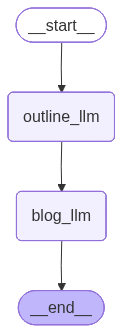

In [32]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())